# Introduction to digital forensics of cybercrime
## Assignment 2 - Database forensics
### Project Group 4
    Loek van der Gugten 1975331
    Reinier de Ridder   1701134
    Frank Nijeboer      2011972
    Jos Bartels         1941224
    Dionne Kingma       2419874
    Hanneke Verschoor   1954334

## Motivation and Goals

## Methodology

## Data
The data used in this assignment is loaded from the provided 'table_attack_twbooter.xls'. One slight edit has been made to this document: the url subdomains and prefix have been removed from the victim ip adresses and urls. This is to enable easier analysis of the victims using regular expressions.

For each data segment we briefly explain how we gathered it and why it is useful to have it.

In [1]:
# Load the DataFrame imported in preprocessing.py
from preprocessing import attack_df
# Import matplotlib library
import matplotlib.pyplot as plt

In [2]:
# Display the DataFrame to show used data as imported from 'table_attack_twbooter.xls'
attack_df

,id,processid,victim,port_service`_type,type,duration,time,stopped,client_attacker,server_used_in_th_attack
0,1,5672,91.214.20.52,80,ESSYN,33,1358989954,1,1,94.102.49.76
1,2,29065,91.214.20.52,80,UDP,1783,1358990329,1,1,93.174.93.30
2,3,23005,78.31.8.124,80,ESSYN,393,1358991360,0,1,89.248.172.97
3,4,29411,199.204.44.188,80,ESSYN,60,1358995416,0,4,93.174.93.30
4,5,19298,chrome-mods.com,80,RUDY,50000,1358995471,1,3,72.9.144.80
...,...,...,...,...,...,...,...,...,...,...
48768,48840,15874|1992|28878|32327,109.234.152.119,1973,ESSYN,300,1363351101,0,258,94.102.49.79|94.102.51.252|89.248.160.146|89.2...
48769,48841,15022|19087|28887,94.242.205.227,80,SOURCE,65,1363351473,1,261,72.9.144.80|67.222.156.241|89.248.160.146
48770,48842,15026|19091|28896,94.242.205.227,80,ARME,65,1363351493,1,261,72.9.144.80|67.222.156.241|89.248.160.146
48771,48843,15898|3409|32693|2010,94.242.205.227,80,ESSYN,65,1363351507,1,261,94.102.49.79|89.248.172.96|89.248.162.242|94.1...


## Analysis

### The total number of attack records
As described in the 'Methodology', this number simply is the total amount of row entries. This number shows how many attacks have been performed.

In [3]:
# Get available index, effectively number of entries in the DataFrame
attack_entries = attack_df.index
# Display lenght of index, resulting in int of entries in the DataFrame
print(len(attack_entries))

48773


### Number of unique users
This number can be found by looking at the amount of unique entries in the column 'client_attacker'. It gives an idea of how many people come to this website to perform attacks and can also provide an estimate about how many attacks each user performs. 

In [4]:
# Get number of unique values in "client_attacker" column
attackers = attack_df["client_attacker"].nunique()
# Display number
print(attackers)

277


### Top 10 Victim IP Addresses
The graph below shows the top 10 occuring ip addresses in the column 'victim'. The numbers have been retrieved by filtering the entries of this column on a combination of 4 numbers with dots in between (as is the format of an ip address), and then per unique occurence counting the amount of duplicates. The 10 most occuring ones are listed in the diagram.

This data is interesting for the users of those ip addresses. It shows them that they are being targeted quite frequently compared to other victims. If we were to investigate these addresses further, it could also show us motives for the attackers to attack these addresses so often.

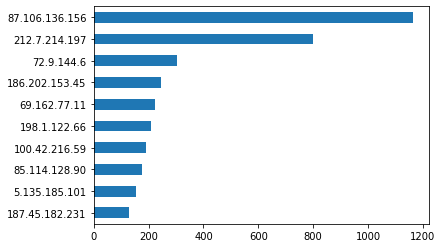

In [5]:
# IPython magic command for bts setup
%matplotlib inline
# Get values in column 'victim' that contains an ip adress (RegEx)
victims_ips = attack_df[attack_df["victim"].str.contains("[0-9].[0-9].[0-9].[0-9]")]
# Count number of entries for each value in 'victim' column, take the top 10, sort these in descending order and plot as a horizontal bar graph
victims_ips["victim"].value_counts().head(10).sort_values().plot.barh()
# Display the graph
plt.show()

### Top 10 Victim Domain Names
This diagram has been generated similarly to the previous one ('Top 10 Victim IP Addresses'). The only difference is that instead of filtering the entries on numbers with dots in between, they are filtered on containing a (non)capital letter.

Like the way we analysed this data, the use for it is also the same as the previous section 'Top 10 Victim IP Addresses'. Domain names could be more interesting because they could be valued more than an IP address, but this isn't necessarily the case.

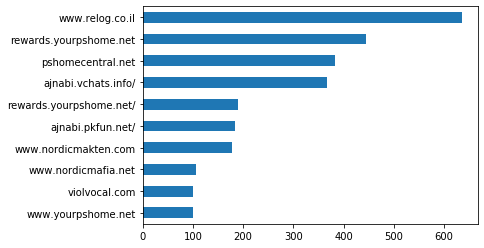

In [6]:
# Get values in column 'victim' that contains an url (RegEx)
victim_domains = attack_df[attack_df["victim"].str.contains("[A-z]")]
# Count number of entries for each value in 'victim' column, take the top 10, sort these in descending order and plot as a horizontal bar graph
victim_domains["victim"].value_counts().head(10).sort_values().plot.barh()
# Display the graph
plt.show()

### The longest attack duration
Trivially the longest attack duration is the highest number in the column 'duration'. This is the first number below. We also determined how many attacks took this long, see the second number below.

With this information we now have sort of an upper bound on how long a single attacks last. The amount of attacks that took this long also show us at what rate this happens.

In [7]:
# Get biggest value in 'duration' column
duration = attack_df['duration'].max()
amount_of_duration = attack_df['duration'].value_counts().get(500000)
# amount_of_duration = attack_df['duration'].count(duration)
# Display value
print(duration, amount_of_duration)

500000 35


### Top 3 attack type
Here we display the top 3 types of attacks. The diagram below shows the three types of attacks, with the amount of attacks displayed on the horizontal axis. We determined these values by counting the amount of occurences in the column 'type' per type of attack and then plotting the top three from that list.

This shows which type(s) of attack(s) is (are) executed most often, and thus which type of attack is most likely preferred by attackers. This information could help with determining what type of attack to focus on when for example defending your system from these attacks.

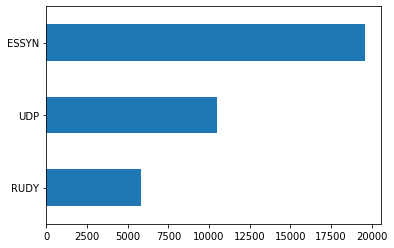

In [8]:
# Count number of entries for each value in 'type' column
attack_types = attack_df['type'].value_counts()
# Take the top 3, sort these in descending order and plot as a horizontal bar graph
attack_types.head(3).sort_values().plot.barh()
# Display the graph
plt.show()

### Which owner id performed most of the attacks
The two lines and the diagram below show the id that performed the highest amount of attacks, together with how many attacks it performed, and a top 10 diagram of the id's that performed attacks. The id that performed the highest amount of attacks we found by calculating the id that occurs most frequently in the column 'client_attacker'. The values in the diagram are determined like the types of attacks in the previous segment.

This information shows us which owner id's performed the highest amount of attacks. If we were to try and identify attackers these would be id's to focus on since they performed a lot of attacks.

0    272
dtype: int64
272    2307
Name: client_attacker, dtype: int64


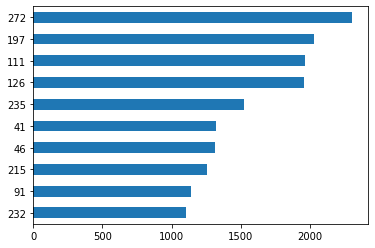

In [11]:
# Get the modes (highest frequency value) of 'client_attacker' column
attack_id = attack_df['client_attacker'].mode()
# Display modes
print(attack_id)

# Count number of entries for each value in 'client_attacker' column
attack_id = attack_df['client_attacker'].value_counts()
# Print the number of entries for number one
print(attack_id.head(1))

# Take the top 10, sort these in descending order and plot as a horizontal bar graph
attack_id.head(10).sort_values().plot.barh()
# Display graph
plt.show()

### How many attacks 'krebsonsecurity.com' suffered
The number below shows how many attacks the domain 'krebsonsecurity.com' has suffered. It is found by looking up the amount of entries that contain 'krebsonsecurity.com' in the column 'victim'.

This number shows how often the domain of journalist Brian Krebs has been targeted by attacks from TWBooter.

In [ ]:
# Get entries containing 'krebsonsecurity.com' from 'victims' column
# This ensures also values with added subdomains etc are included
kreb_attacks = attack_df[attack_df.victim.str.contains('krebsonsecurity.com')]
# Display lenght of entries, resulting in int of entries in the DataFrame
print(len(kreb_attacks))

### Two statistics that aren't listed above

#### How often is port 80 used in port_service_type
The number and percentage below show how often port 80 has been used in attacks. This is interesting because port 80 is the HTTP port, so it shows how often a HTTP connection has been targeted.
The circlediagram below shows which percentage of the total amount of attacks has been performed on which port.

The data has been determined by filtering the entries in the column 'port_service_type' on value 80. The circlediagram has been created from the counts of occurneces of each entry in this column.

In [ ]:
# Get entries in 'port_service' column that equal 80
port80_attacks = attack_df[attack_df['port_service`_type']==80]
# Display lenght of entries, resulting in int of entries in the DataFrame compared to total number of entries
print(str(len(port80_attacks)) + ' out of ' + str(len(attack_entries)))
# Calculate and display percentage of '80' entries
print(str(int(len(port80_attacks)/len(attack_entries)*100))+'%')

# Count number of entries for each value in 'port_service' column
port80_plot = attack_df["port_service`_type"].value_counts()
# Plot pie graph
port80_plot.plot.pie(autopct='%1.1f%%')
# Display graph
plt.show()

#### What percentage of attacks got stopped
The numbers and circlediagram below show how many of the attacks got stopped, and how many didn't. A '1' in the column 'stopped' means that the attack from that entry got stopped, a '0' means it didn't get stopped. Simply counting the amount of 1's and 0's in this column provide us with the data displayed below.

In [ ]:
# Get entries in 'stopped' column that equal 1
stopped_attacks = attack_df[attack_df['stopped']==1]
# Display lenght of entries, resulting in int of entries in the DataFrame compared to total number of entries
print(str(len(stopped_attacks)) + ' out of ' + str(len(attack_entries)))
# Calculate and display percentage of '1' entries
print(str(int(len(stopped_attacks)/len(attack_entries)*100))+'%')

# Count number of entries for each value in 'stopped' column
stopped_attacks = attack_df["stopped"].value_counts()
# Plot pie graph
stopped_attacks.plot.pie(autopct='%1.1f%%')
# Display graph
plt.show()

## Conclusion